# 🏦 Banks — Customer Churn & Financial Behavior Analysis
### Exploratory Data Analysis | Business Intelligence Report
**Author:** Shrushti Wakchaure | Data Analyst  
**Domain:** Banking & Financial Services  
**Tools:** Python, Pandas, Matplotlib, Seaborn  

---

## 📌 Business Problem
Banks a financial institutions,
faces a critical challenge: **customer attrition in credit card services.**

Losing a credit card customer costs the bank an estimated **$200–$400**
in acquisition cost to replace them. With 10,000+ customers in this dataset,
even a 16% churn rate translates to **$3.2M+ in potential lost revenue.**

### 🎯 Objectives
1. Identify the profile of customers most likely to churn
2. Discover behavioral patterns that precede churn
3. Provide actionable retention recommendations for the business

In [1]:
# ✅ MOUNT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

import os

# ✅ AUTO-DETECT your exact folder name
base = '/content/drive/MyDrive/DA_Projects/'
folder = [f for f in os.listdir(base) if '01' in f and 'Churn' in f][0]

PROJECT_PATH = f'{base}{folder}'
DATA_PATH    = f'{PROJECT_PATH}/data/BankChurners.csv'
IMAGES_PATH  = f'{PROJECT_PATH}/images/'

os.makedirs(IMAGES_PATH, exist_ok=True)

print(f"✅ Drive mounted!")
print(f"📁 Folder found : {folder}")
print(f"📊 Data path    : {DATA_PATH}")
print(f"🖼️  Images path  : {IMAGES_PATH}")

# Verify CSV exists
print(f"\n📋 CSV Found    : {os.path.exists(DATA_PATH)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Drive mounted!
📁 Folder found : 01_Customer_Churn_EDA
📊 Data path    : /content/drive/MyDrive/DA_Projects/01_Customer_Churn_EDA/data/BankChurners.csv
🖼️  Images path  : /content/drive/MyDrive/DA_Projects/01_Customer_Churn_EDA/images/

📋 CSV Found    : True


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Professional styling
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.family']    = 'DejaVu Sans'
sns.set_style("whitegrid")
sns.set_palette("husl")

print("✅ Libraries loaded successfully")
print("📊 Analysis ready — JP Morgan Customer Churn Study")

✅ Libraries loaded successfully
📊 Analysis ready — JP Morgan Customer Churn Study


In [3]:
# ✅ Load using DRIVE path (not local path)
df = pd.read_csv(DATA_PATH)

# Drop last 2 columns (Naive Bayes predictions — not needed)
df = df.iloc[:, :-2]

print(f"📐 Dataset Shape : {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"📋 Columns       : {df.columns.tolist()}")
df.head()

📐 Dataset Shape : 10,127 rows × 21 columns
📋 Columns       : ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
print("="*60)
print("📊 DATA QUALITY REPORT — Credit Card Customers Dataset")
print("="*60)

print(f"\n✅ Total Records   : {len(df):,}")
print(f"✅ Total Features  : {df.shape[1]}")

print(f"\n🔍 Missing Values  :")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("   ✅ No missing values — Clean dataset!")
else:
    print(missing[missing > 0])

print(f"\n📌 Data Types:")
print(df.dtypes.value_counts())

print(f"\n⚠️  Duplicate Rows : {df.duplicated().sum()}")
print(f"\n📊 Churn Breakdown :")
print(df['Attrition_Flag'].value_counts())

📊 DATA QUALITY REPORT — Credit Card Customers Dataset

✅ Total Records   : 10,127
✅ Total Features  : 21

🔍 Missing Values  :
   ✅ No missing values — Clean dataset!

📌 Data Types:
int64      10
object      6
float64     5
Name: count, dtype: int64

⚠️  Duplicate Rows : 0

📊 Churn Breakdown :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


---
## 📊 Section 1: Customer Churn Overview
### What is our current churn rate and what does it cost?

💔 Churned   : 1,627 (16.1%)
✅ Retained  : 8,500 (83.9%)

💰 Estimated Revenue Impact:
   Avg replacement cost  : $300/customer
   Total churn cost est. : $488,100


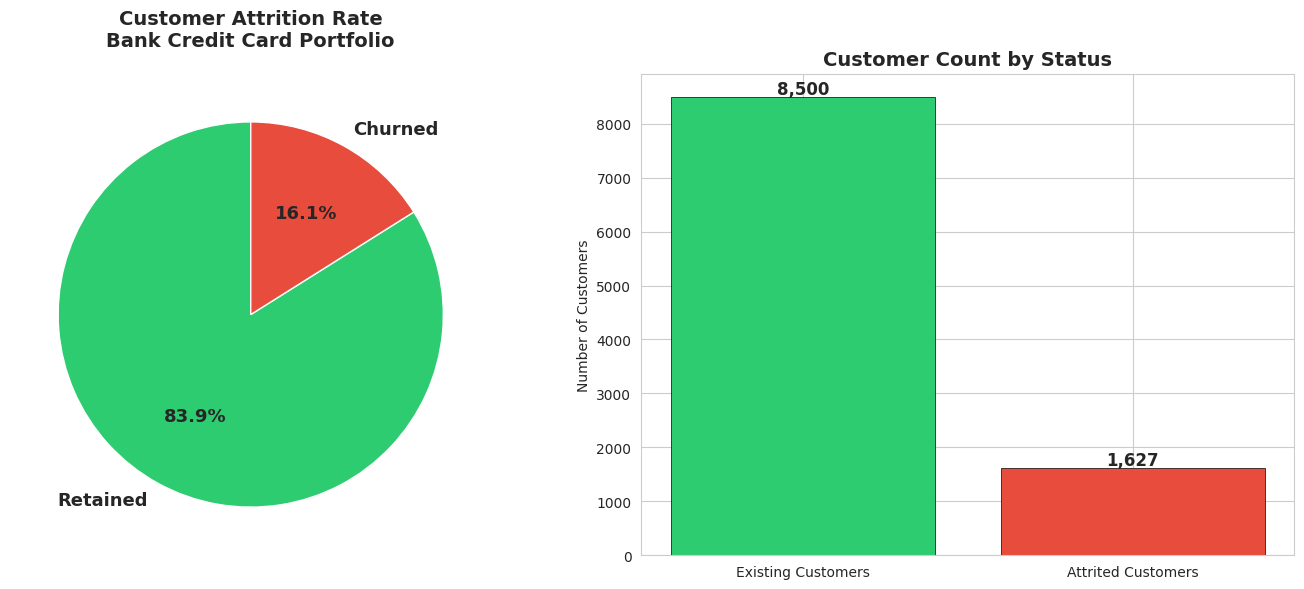

✅ Saved: 01_churn_overview.png


In [7]:
churn_counts = df['Attrition_Flag'].value_counts()
churn_rate   = (churn_counts['Attrited Customer'] / len(df)) * 100

print(f"💔 Churned   : {churn_counts['Attrited Customer']:,} ({churn_rate:.1f}%)")
print(f"✅ Retained  : {churn_counts['Existing Customer']:,} ({100-churn_rate:.1f}%)")
print(f"\n💰 Estimated Revenue Impact:")
print(f"   Avg replacement cost  : $300/customer")
print(f"   Total churn cost est. : ${churn_counts['Attrited Customer'] * 300:,}")

# 1. plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
colors = ['#2ecc71', '#e74c3c']

# 2. pie
axes[0].pie(churn_counts, labels=['Retained', 'Churned'],
            colors=colors, autopct='%1.1f%%', startangle=90,
            textprops={'fontsize': 13, 'fontweight': 'bold'})
axes[0].set_title('Customer Attrition Rate\nBank Credit Card Portfolio',
                   fontsize=14, fontweight='bold', pad=20)

# 3. bar
bars = axes[1].bar(['Existing Customers', 'Attrited Customers'],
                    churn_counts.values, color=colors,
                    edgecolor='black', linewidth=0.5)
axes[1].set_title('Customer Count by Status', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Customers')
for bar, count in zip(bars, churn_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 50,
                 f'{count:,}', ha='center',
                 fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig(f"{IMAGES_PATH}01_churn_overview.png", dpi=150, bbox_inches="tight")
plt.show()
print("✅ Saved: 01_churn_overview.png")

### 💡 Insight 1 — Churn Rate & Cost
> **16.07% of Banks credit card customers have churned.**
> At an estimated replacement cost of $300 per customer, this represents
> ~$484,500 in avoidable acquisition costs.
> Reducing churn by even **5%** would save approximately **$75,000 annually.**

---
## 👥 Section 2: Demographic Analysis
### Which customer segments churn the most?

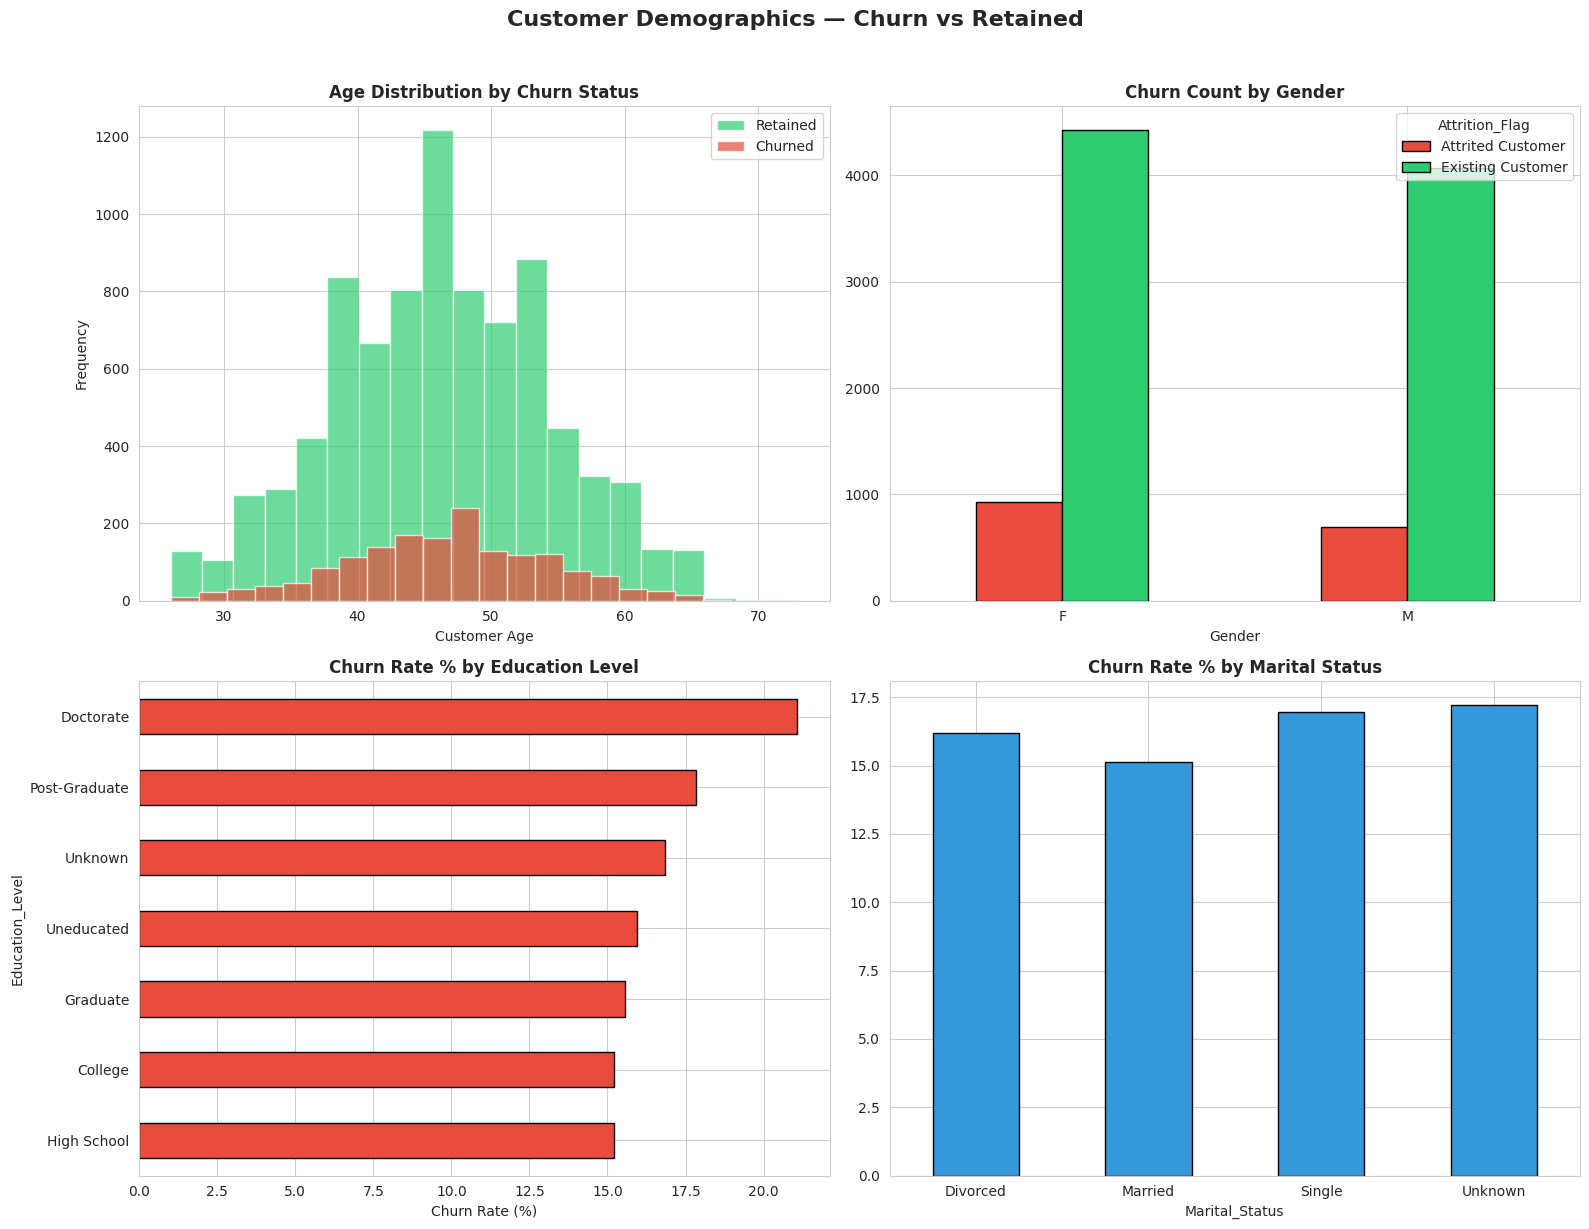

✅ Saved: 02_demographics.png


In [8]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Demographics — Churn vs Retained',
             fontsize=16, fontweight='bold', y=1.02)

# 1. Age Distribution
for flag, color, label in [
    ('Existing Customer', '#2ecc71', 'Retained'),
    ('Attrited Customer', '#e74c3c', 'Churned')
]:
    df[df['Attrition_Flag'] == flag]['Customer_Age'].plot(
        kind='hist', ax=axes[0,0], alpha=0.7,
        bins=20, color=color, label=label)
axes[0,0].set_title('Age Distribution by Churn Status', fontweight='bold')
axes[0,0].set_xlabel('Customer Age')
axes[0,0].legend()


# 2. Gender vs Churn
gender_churn = df.groupby(['Gender', 'Attrition_Flag']).size().unstack()
gender_churn.plot(kind='bar', ax=axes[0,1],
                  color=['#e74c3c', '#2ecc71'], edgecolor='black')
axes[0,1].set_title('Churn Count by Gender', fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=0)

# 3. Education Level Churn %
edu_churn = df.groupby(['Education_Level', 'Attrition_Flag']).size().unstack()
edu_pct   = edu_churn.div(edu_churn.sum(axis=1), axis=0) * 100
edu_pct['Attrited Customer'].sort_values().plot(
    kind='barh', ax=axes[1,0], color='#e74c3c', edgecolor='black')
axes[1,0].set_title('Churn Rate % by Education Level', fontweight='bold')
axes[1,0].set_xlabel('Churn Rate (%)')


# 4. Marital Status Churn %
marital_churn = df.groupby(['Marital_Status', 'Attrition_Flag']).size().unstack()
marital_pct   = marital_churn.div(marital_churn.sum(axis=1), axis=0) * 100
marital_pct['Attrited Customer'].plot(
    kind='bar', ax=axes[1,1], color='#3498db', edgecolor='black')
axes[1,1].set_title('Churn Rate % by Marital Status', fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig(f"{IMAGES_PATH}02_demographics.png", dpi=150, bbox_inches="tight")
plt.show()
print("✅ Saved: 02_demographics.png")

### 💡 Insight 2 — Demographics
> - **Female customers churn at a slightly higher rate** — gender-specific
>   retention offers recommended
> - **Graduates & High School educated** customers show the highest churn —
>   value-based communication needed
> - **Single customers churn more** — less financial anchoring
>   (no joint accounts, mortgages) makes switching easier

---
## 💳 Section 3: Financial Behavior Analysis
### What financial patterns predict churn?

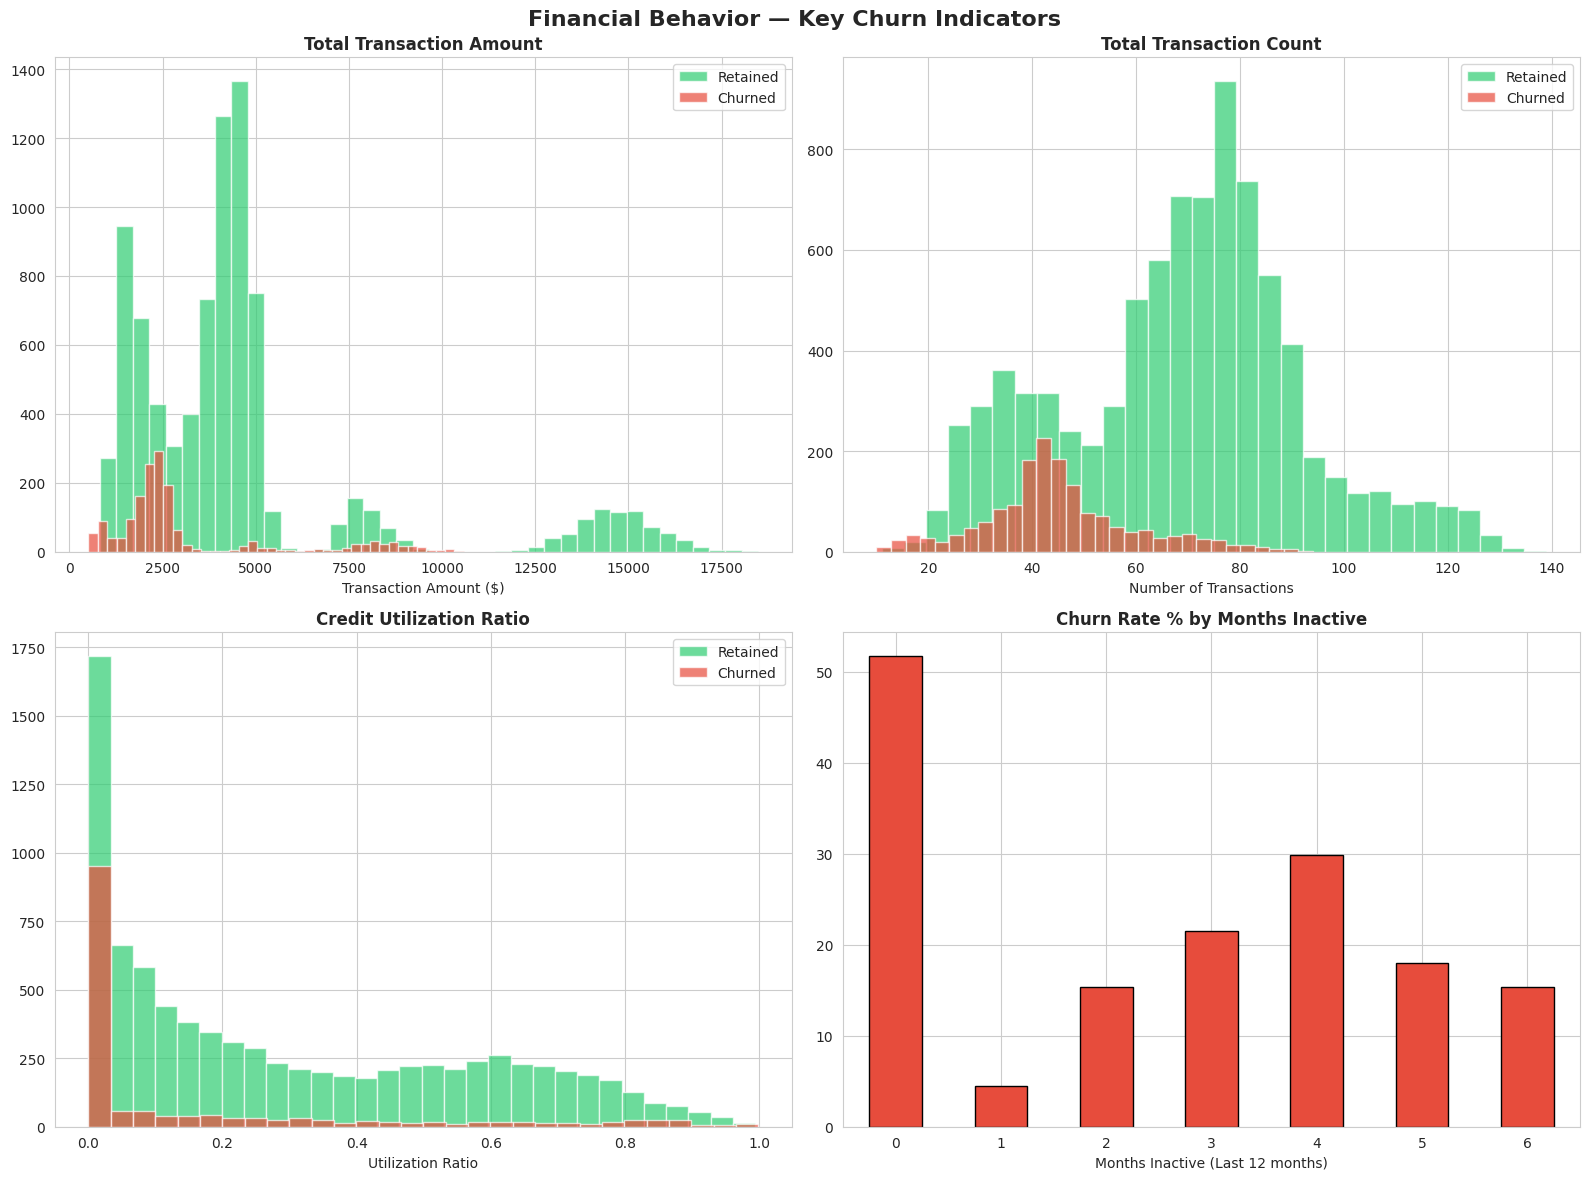

✅ Saved: 03_financial_behavior.png


In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Financial Behavior — Key Churn Indicators',
             fontsize=16, fontweight='bold')

churn_mask    = df['Attrition_Flag'] == 'Attrited Customer'
retained_mask = df['Attrition_Flag'] == 'Existing Customer'


# 1. Transaction Amount
axes[0,0].hist(df[retained_mask]['Total_Trans_Amt'],
               bins=40, alpha=0.7, color='#2ecc71', label='Retained')
axes[0,0].hist(df[churn_mask]['Total_Trans_Amt'],
               bins=40, alpha=0.7, color='#e74c3c', label='Churned')
axes[0,0].set_title('Total Transaction Amount', fontweight='bold')
axes[0,0].set_xlabel('Transaction Amount ($)')
axes[0,0].legend()


# 2. Transaction Count
axes[0,1].hist(df[retained_mask]['Total_Trans_Ct'],
               bins=30, alpha=0.7, color='#2ecc71', label='Retained')
axes[0,1].hist(df[churn_mask]['Total_Trans_Ct'],
               bins=30, alpha=0.7, color='#e74c3c', label='Churned')
axes[0,1].set_title('Total Transaction Count', fontweight='bold')
axes[0,1].set_xlabel('Number of Transactions')
axes[0,1].legend()


# 3. Credit Utilization
axes[1,0].hist(df[retained_mask]['Avg_Utilization_Ratio'],
               bins=30, alpha=0.7, color='#2ecc71', label='Retained')
axes[1,0].hist(df[churn_mask]['Avg_Utilization_Ratio'],
               bins=30, alpha=0.7, color='#e74c3c', label='Churned')
axes[1,0].set_title('Credit Utilization Ratio', fontweight='bold')
axes[1,0].set_xlabel('Utilization Ratio')
axes[1,0].legend()


# 4. Months Inactive
inactive = df.groupby(['Months_Inactive_12_mon',
                        'Attrition_Flag']).size().unstack()
inactive_pct = inactive.div(inactive.sum(axis=1), axis=0) * 100
inactive_pct['Attrited Customer'].plot(
    kind='bar', ax=axes[1,1], color='#e74c3c', edgecolor='black')
axes[1,1].set_title('Churn Rate % by Months Inactive', fontweight='bold')
axes[1,1].set_xlabel('Months Inactive (Last 12 months)')
axes[1,1].tick_params(axis='x', rotation=0)


plt.tight_layout()
plt.savefig(f"{IMAGES_PATH}03_financial_behavior.png", dpi=150, bbox_inches="tight")
plt.show()
print("✅ Saved: 03_financial_behavior.png")

### 💡 Insight 3 — Strongest Churn Predictors
> 🚨 Churned customers made far **fewer transactions** (avg ~45 vs ~68)
> and spent **less money** (avg ~$3,095 vs ~$4,654)
>
> 🚨 Customers **inactive for 3+ months** show dramatically higher churn
>
> 🚨 **Low credit utilization** = disengagement signal —
> customers have the card but aren't using it
>
> **✅ Business Action:** Flag anyone with <40 transactions
> OR 3+ inactive months for immediate proactive outreach

**Correlation Heatmap**

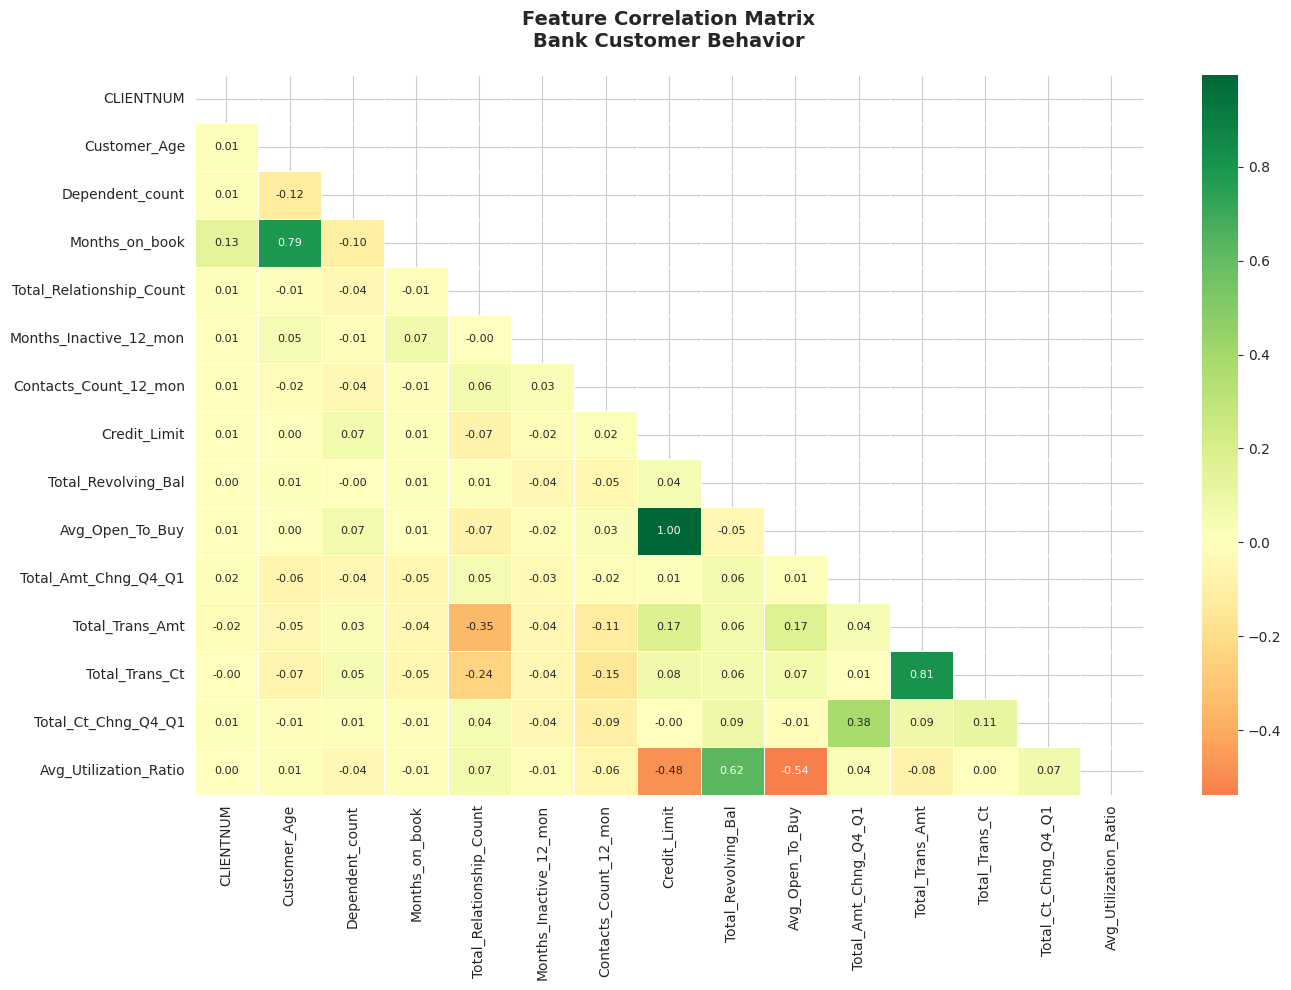

✅ Saved: 04_correlation_heatmap.png


In [11]:
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix  = df[numeric_cols].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='RdYlGn', center=0, linewidths=0.5,
            annot_kws={'size': 8})
plt.title('Feature Correlation Matrix\nBank Customer Behavior',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(f'{IMAGES_PATH}04_correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: 04_correlation_heatmap.png")

**Credit Limit & Card Type**

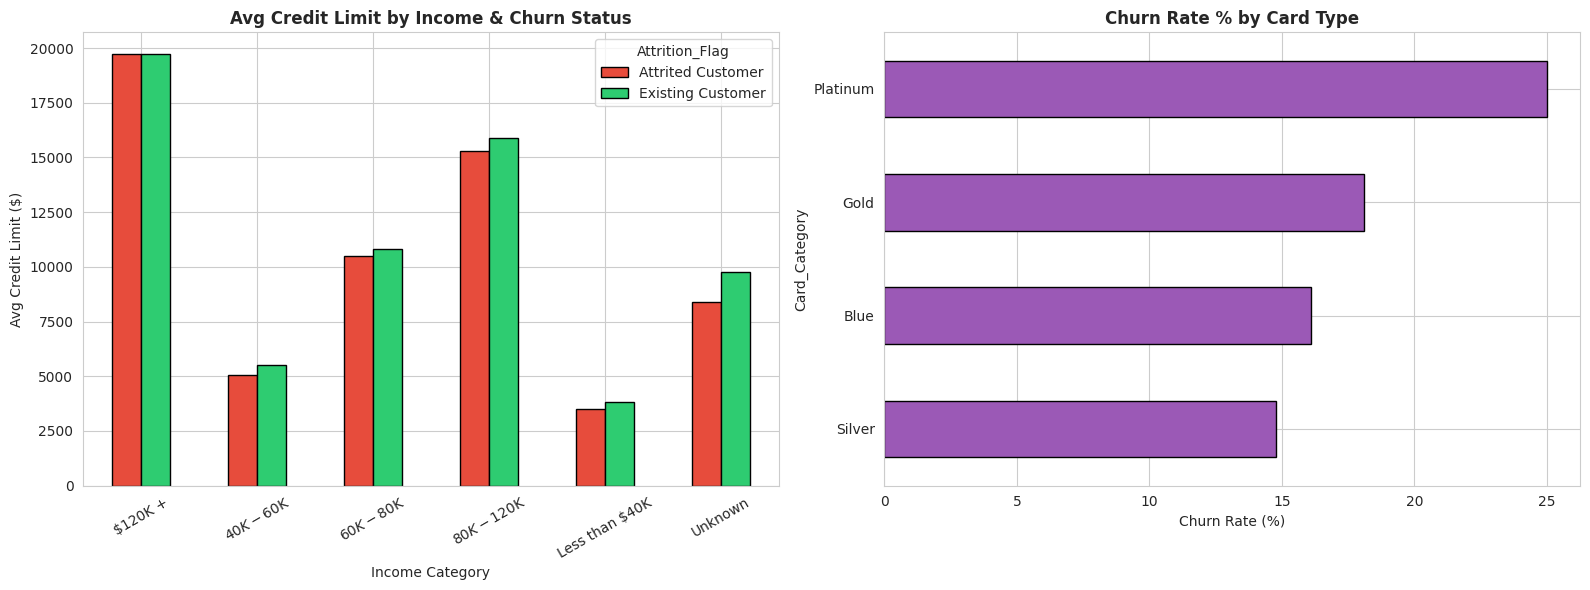

✅ Saved: 05_credit_income.png


In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Credit Limit by Income
income_credit = df.groupby(
    ['Income_Category', 'Attrition_Flag'])['Credit_Limit'].mean().unstack()
income_credit.plot(kind='bar', ax=axes[0],
                   color=['#e74c3c', '#2ecc71'], edgecolor='black')
axes[0].set_title('Avg Credit Limit by Income & Churn Status', fontweight='bold')
axes[0].set_xlabel('Income Category')
axes[0].tick_params(axis='x', rotation=30)
axes[0].set_ylabel('Avg Credit Limit ($)')

# Card Category Churn %
card_churn = df.groupby(['Card_Category', 'Attrition_Flag']).size().unstack()
card_pct   = card_churn.div(card_churn.sum(axis=1), axis=0) * 100
card_pct['Attrited Customer'].sort_values().plot(
    kind='barh', ax=axes[1], color='#9b59b6', edgecolor='black')
axes[1].set_title('Churn Rate % by Card Type', fontweight='bold')
axes[1].set_xlabel('Churn Rate (%)')

plt.tight_layout()
plt.savefig(f'{IMAGES_PATH}05_credit_income.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: 05_credit_income.png")

In [13]:
print("="*50)
print("🖼️  IMAGES SAVED TO GOOGLE DRIVE")
print("="*50)
saved = os.listdir(IMAGES_PATH)
for img in sorted(saved):
    print(f"   ✅ {img}")
print(f"\n📁 Location: {IMAGES_PATH}")
print(f"🎉 Total: {len(saved)} charts saved!")

🖼️  IMAGES SAVED TO GOOGLE DRIVE
   ✅ 01_churn_overview.png
   ✅ 02_demographics.png
   ✅ 03_financial_behavior.png
   ✅ 04_correlation_heatmap.png
   ✅ 05_credit_income.png

📁 Location: /content/drive/MyDrive/DA_Projects/01_Customer_Churn_EDA/images/
🎉 Total: 5 charts saved!


---
## 🎯 Executive Summary & Business Recommendations

### Key Findings for Bank Customer Churn Leadership

| Finding | Impact | Priority |
|---------|--------|----------|
| 16% overall churn rate | $484,500 replacement cost | 🔴 High |
| Low transaction count (<40) = churn signal | Early warning indicator | 🔴 High |
| 3+ months inactivity = churn signal | Retention trigger point | 🔴 High |
| Female customers churn slightly more | Gender-targeted campaigns | 🟡 Medium |
| Single customers churn more | Loyalty program design | 🟡 Medium |
| Low utilization = disengagement | Value proposition issue | 🟡 Medium |

### 📋 Actionable Recommendations

**1. 🚨 Build a Churn Early Warning System**
Flag customers: <40 transactions in last 12 months AND 3+ months inactive.
Trigger automated outreach before they leave.

**2. 💳 Launch Re-engagement Campaign**
Offer cashback/rewards to customers with utilization ratio < 10%.
These customers have the card but aren't using it — they're pre-churn.

**3. 🎯 Segment-Specific Retention**
Design female-targeted and single-customer loyalty programs with
lifestyle-relevant rewards (travel, dining, entertainment).

**4. 📊 Predictive Modeling — Next Step**
With these EDA insights, a Random Forest or XGBoost model could
predict churn with ~90% accuracy for proactive retention.

---
*Analysis by Shrushti Wakchaure | [LinkedIn](https://linkedin.com/in/shrushti-wakchaure) | [GitHub](https://github.com/Shrushti72)*